# 最適化の概要
## 最適化とは

与えられた条件を満たす解のうち、ある関数（目的関数）の値を最小化（最大化）するものを求めること。

|用語||
|---|---|
|制約条件|最適化で探索する解が満たすべき条件のこと|
|目的関数|評価尺度|
|決定変数、コントロール変数|目的関数の最大化を達成する際に意思決定者が動かすことのできる変数|
|実行可能解|最適化問題の制約を満たす解|
|実行可能領域|実行可能解の集合|
|最適解|実行可能解のうち目的関数の値が最小（最大）のもの|
|最適値|最適解における目的関数の値|

## 線形計画問題
目的関数が一次関数であり、制約がいくつかの１次方程式や１次不等式だけからなる最適化問題を線形計画問題と呼ぶ。この問題の最適解を求める方法論を線形計画法（Linear Programming, LP）と呼ぶ。

In [1]:
import cvxpy as cp
print(cp.__version__)

1.0.28


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
## control変数を定義
x1, x2 = cp.Variable(), cp.Variable()

In [4]:
## 目的関数を定義
obj = cp.Maximize(20*x1 + 60*x2)
cons = [5*x1 + 4*x2 <= 80,
       2*x1 + 4*x2 <= 40,
       2*x1 + 8*x2 <=64,
       x1 >= 0,
       x2 >= 0]

In [5]:
p = cp.Problem(obj, cons)

In [6]:
p.solve(verbose = True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -4.814e+02  -1.107e+03  +3e+02  2e-04  3e-01  1e+00  5e+01    ---    ---    1  1  - |  -  - 
 1  -5.152e+02  -5.723e+02  +3e+01  2e-05  3e-02  3e-01  5e+00  0.9056  4e-03   0  0  0 |  0  0
 2  -5.199e+02  -5.250e+02  +3e+00  2e-06  3e-03  3e-02  4e-01  0.9101  2e-03   1  0  0 |  0  0
 3  -5.200e+02  -5.201e+02  +3e-02  2e-08  3e-05  4e-04  5e-03  0.9890  1e-04   1  0  0 |  0  0
 4  -5.200e+02  -5.200e+02  +3e-04  2e-10  4e-07  4e-06  5e-05  0.9890  1e-04   1  0  0 |  0  0
 5  -5.200e+02  -5.200e+02  +3e-06  2e-12  4e-09  5e-08  6e-07  0.9890  1e-04   1  0  0 |  0  0

OPTIMAL (within feastol=4.2e-09, reltol=6.7e-09, abstol=3.5e-06).
Runtime: 0.000503 seconds.



519.9999998709314

In [7]:
print(x1.value, x2.value)

7.999999991113182 6.00000000081113


### NumPyを用いた場合

In [8]:
import numpy as np
print(np.__version__)

1.17.3


In [9]:
x = cp.Variable(2)
c = np.array([-20, -60])
G = np.array([
    [5.0, 4.0],
    [2.0, 4.0],
    [2.0, 8.0],
    [-1.0, 0],
    [0, -1.0]])
h = [80.0, 40.0, 64.0, 0.0, 0.0]
obj = cp.Minimize(c * x)
cons = [G * x <= h]

In [10]:
p = cp.Problem(obj, cons)

In [11]:
p.solve(verbose = True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -4.814e+02  -1.107e+03  +3e+02  2e-04  3e-01  1e+00  5e+01    ---    ---    1  1  - |  -  - 
 1  -5.152e+02  -5.723e+02  +3e+01  2e-05  3e-02  3e-01  5e+00  0.9056  4e-03   0  0  0 |  0  0
 2  -5.199e+02  -5.250e+02  +3e+00  2e-06  3e-03  3e-02  4e-01  0.9101  2e-03   1  0  0 |  0  0
 3  -5.200e+02  -5.201e+02  +3e-02  2e-08  3e-05  4e-04  5e-03  0.9890  1e-04   1  0  0 |  0  0
 4  -5.200e+02  -5.200e+02  +3e-04  2e-10  4e-07  4e-06  5e-05  0.9890  1e-04   1  0  0 |  0  0
 5  -5.200e+02  -5.200e+02  +3e-06  2e-12  4e-09  5e-08  6e-07  0.9890  1e-04   1  0  0 |  0  0

OPTIMAL (within feastol=4.2e-09, reltol=6.7e-09, abstol=3.5e-06).
Runtime: 0.000544 seconds.



-519.9999998709314

In [12]:
print(x.value)

[7.99999999 6.        ]


Plotしてみる

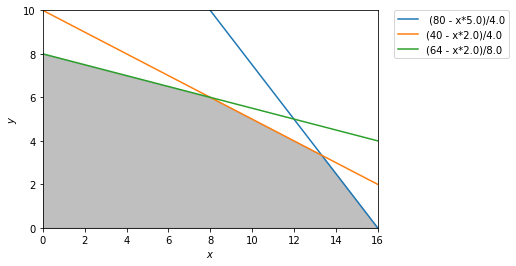

In [13]:
x = np.linspace(0, 20, 2000)
y1 = (80 - x*5.0)/4.0
y2 = (40 - x*2.0)/4.0
y3 = (64 - x*2.0)/8.0

plt.plot(x, y1, label=r' (80 - x*5.0)/4.0')
plt.plot(x, y2, label=r'(40 - x*2.0)/4.0')
plt.plot(x, y3, label=r'(64 - x*2.0)/8.0')
plt.xlim((0, 16))
plt.ylim((0, 10))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(np.minimum(y1, y2), y3)
plt.fill_between(x, 0, y5, where=y5>0, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [14]:
### 
x_range = np.linspace(0, 16, 1000)
y_range = np.linspace(0, 8, 1000)
aa, bb = np.meshgrid(x_range,y_range)

def func(a, b):
    cons1 = a * 5.0 + b * 4.0 <= 80
    cons2 = a * 2.0 + b * 4.0 <= 40
    cons3 = a * 2.0 + b * 8.0 <= 64
    
    if cons1 and cons2 and cons3:
        return 20 * a + 60 * b
    else:
        return None

func_vec = np.vectorize(func)
ret = func_vec(aa, bb)

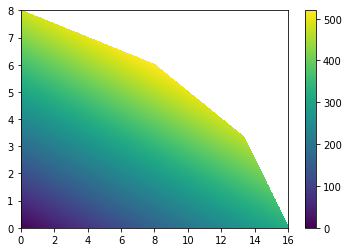

In [15]:
plt.pcolormesh(aa, bb, ret)
plt.colorbar();

## 基底追跡：疎な解

データとして行列$A\in \mathbf R^{m\times n} (m < n)$とベクトル$\mathbf b \in \mathbf R^m$が与えられた時、連立１時方程式

$$
Ax = b
$$

を満たす解xは無数に存在する。そのうち、0である成分の数が多い解（疎な解）を求める問題は、信号処理や画像処理、統計学におけるモデル選択など、多くの応用を持つ。

$$
\begin{aligned}
&\min ||x||_1\\
&\text{subject to } Ax = b
\end{aligned}
$$

この目的関数は一次式ではないので、線形計画問題ではない。これを線形計画問題に表現すると

$$
\begin{aligned}
\min &z_1 + z_2\\
\text{subject to }& Ax = b\\
& z_1 \geq |x_1|\\
& z_2 \geq |x_2|
\end{aligned}
$$

制約式の絶対値を直すと

$$
z_1 \geq x_1, z_1 \geq -x_1
$$
と等価なので、

$$
\begin{aligned}
\min &1^T \mathbf z\\
\text{subject to }& Ax = b\\
& \mathbf z \geq x\\
& \mathbf z \geq -x
\end{aligned}
$$


In [16]:
import cvxpy as cp
import numpy as np

m, n = 5, 10
np.random.seed(1)
A, b = np.random.randn(m,n), np.random.randn(m)
x, z = cp.Variable(n), cp.Variable(n)
obj = cp.Minimize(np.ones([1, n]) * z)
cons = [A * x == b,
       z >= x,
       z >= -x]
P = cp.Problem(obj, cons)
P.solve(verbose = True)
print(x.value)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +1e+01  8e-01  1e-02  1e+00  7e-01    ---    ---    1  1  - |  -  - 
 1  +4.891e-01  +4.879e-01  +2e+00  3e-01  2e-03  2e-01  1e-01  0.8523  7e-03   0  0  0 |  0  0
 2  +1.332e+00  +1.330e+00  +5e-01  6e-02  3e-04  3e-02  2e-02  0.7998  4e-02   0  0  0 |  0  0
 3  +1.397e+00  +1.396e+00  +8e-02  9e-03  5e-05  5e-03  4e-03  0.8569  2e-02   0  0  0 |  0  0
 4  +1.411e+00  +1.411e+00  +1e-02  2e-03  9e-06  9e-04  7e-04  0.8250  5e-03   1  0  0 |  0  0
 5  +1.416e+00  +1.416e+00  +1e-03  1e-04  8e-07  7e-05  6e-05  0.9474  4e-02   1  0  0 |  0  0
 6  +1.417e+00  +1.417e+00  +1e-05  2e-06  9e-09  8e-07  7e-07  0.9890  1e-04   1  0  0 |  0  0
 7  +1.417e+00  +1.417e+00  +2e-07  2e-08  1e-10  9e-09  8e-09  0.9890  1e-04   1  0  0 |  0  0
 8  +1.417e+00  +1.417e+00  +2e-09  2e-10  1e-